<a href="https://colab.research.google.com/github/vibolrothsambath/test_technique/blob/main/test_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test technique

This notebook contains the algorithms for predicting the `TARGET_FLAG` in the auto insurance dataset: pre-processing of variables, training, evaluation of methods, and prediction of the test dataset. The three methods used are logistic regression, Decision Tree Classifier and Random Forest Classifier.

### Import data

In [1]:
# import libraries 
import pandas as pd
pd.set_option('display.max_columns', 60)
import matplotlib.pyplot as plt

In [2]:
# Import data
test = pd.read_csv("/content/test_auto.csv")
train = pd.read_csv("/content/train_auto.csv")

First look at the data:

In [3]:
train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [4]:
test.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,Manager,21,Private,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,M,z_High School,Clerical,74,Private,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,z_No,M,z_High School,Manager,45,Private,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


In [5]:
train.columns

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

In [7]:
train.isnull().sum()

INDEX            0
TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

### Study the varaibles

In [8]:
import seaborn as sns

In [9]:
train.columns.to_series().groupby(train.dtypes).groups

{int64: ['INDEX', 'TARGET_FLAG', 'KIDSDRIV', 'HOMEKIDS', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS'], float64: ['TARGET_AMT', 'AGE', 'YOJ', 'CAR_AGE'], object: ['INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'BLUEBOOK', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'REVOKED', 'URBANICITY']}

#### Numerical variables

The variables `['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']` contain "$" and "," which need to be removed.

In [10]:
# convert ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM'] to integer 

def convert_to_int(col,df):
    col_converted = []
    for i in list(df[col]):
        if type(i) != float: # cannot be replace if it is NaN
            col_converted.append(int(i.replace(',', '').replace('$',''))) # remove , and $, then convert it to integer
        else : 
            col_converted.append(i)
    return col_converted

In [11]:
for i in ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']:
    train[i] = convert_to_int(i,train)

- Fill some missing values

To fill missing values, Multivariate Imputation by Chained Equations (MICE) is used.

In [ ]:
from fancyimpute import IterativeImputer as MICE

For simplicity, we use only the numerical columns.

In [ ]:
# use MICE to fill in missing values
data_selected = train[['INCOME', 'YOJ','HOME_VAL','BLUEBOOK', 'AGE']]
data_mice = pd.DataFrame(MICE().fit_transform(data_selected), columns=['INCOME', 'YOJ','HOME_VAL','BLUEBOOK', 'AGE'])

# replace old columns by filled columns
for i in ['INCOME', 'YOJ','HOME_VAL','BLUEBOOK', 'AGE']:
    train[i] = data_mice[i]

In [14]:
train.isnull().sum()

INDEX            0
TARGET_FLAG      0
TARGET_AMT       0
KIDSDRIV         0
AGE              0
HOMEKIDS         0
YOJ              0
INCOME           0
PARENT1          0
HOME_VAL         0
MSTATUS          0
SEX              0
EDUCATION        0
JOB            526
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

#### Categorical variables

Again for simplicity, missing categorical variables are dropped.

In [15]:
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7163 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        7163 non-null   int64  
 1   TARGET_FLAG  7163 non-null   int64  
 2   TARGET_AMT   7163 non-null   float64
 3   KIDSDRIV     7163 non-null   int64  
 4   AGE          7163 non-null   float64
 5   HOMEKIDS     7163 non-null   int64  
 6   YOJ          7163 non-null   float64
 7   INCOME       7163 non-null   float64
 8   PARENT1      7163 non-null   object 
 9   HOME_VAL     7163 non-null   float64
 10  MSTATUS      7163 non-null   object 
 11  SEX          7163 non-null   object 
 12  EDUCATION    7163 non-null   object 
 13  JOB          7163 non-null   object 
 14  TRAVTIME     7163 non-null   int64  
 15  CAR_USE      7163 non-null   object 
 16  BLUEBOOK     7163 non-null   float64
 17  TIF          7163 non-null   int64  
 18  CAR_TYPE     7163 non-null   object 
 19  RED_CA

In [16]:
var_category = ['TARGET_FLAG', 'PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 
                'URBANICITY', 'CLM_FREQ']

In [17]:
# function for plotting bar plots for categorical variables
def bar_plot(col):
        # get variable
        var = train[col]
        # count number of categorical variable(value/sample)
        varValue = var.value_counts()
        #visualize
        plt.figure(figsize = (9,3))
        plt.bar(varValue.index, varValue)
        plt.xticks(varValue.index, varValue.index.values)
        plt.ylabel("Frequency")
        plt.title(col)
        plt.show()
        print("{}: \n {}".format(col,varValue))

In [18]:
train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.000000,67349.000000,No,0.0,z_No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461,2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.000000,91449.000000,No,257252.0,z_No,M,z_High School,z_Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.000000,16039.000000,No,124191.0,Yes,z_F,z_High School,Clerical,5,Private,4010.0,4,z_SUV,no,38690,2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.000000,93324.335769,No,306251.0,Yes,M,<High School,z_Blue Collar,32,Private,15440.0,7,Minivan,yes,0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,11.959096,114986.000000,No,243925.0,Yes,z_F,PhD,Doctor,36,Private,18000.0,1,z_SUV,no,19217,2,Yes,3,17.0,Highly Urban/ Urban


Visualise categorical variables:

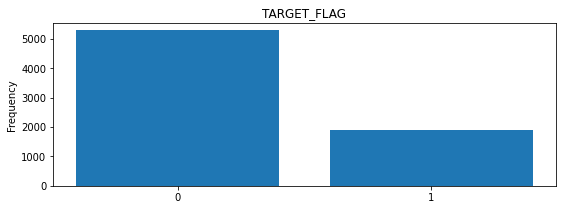

TARGET_FLAG: 
 0    5282
1    1881
Name: TARGET_FLAG, dtype: int64


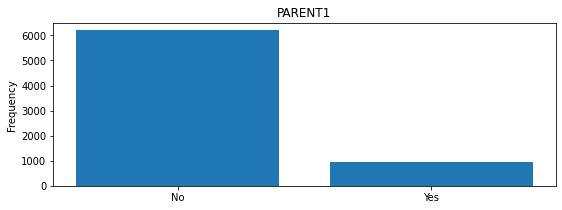

PARENT1: 
 No     6197
Yes     966
Name: PARENT1, dtype: int64


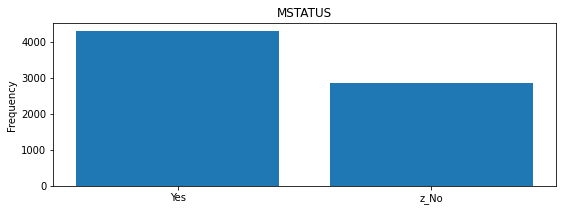

MSTATUS: 
 Yes     4312
z_No    2851
Name: MSTATUS, dtype: int64


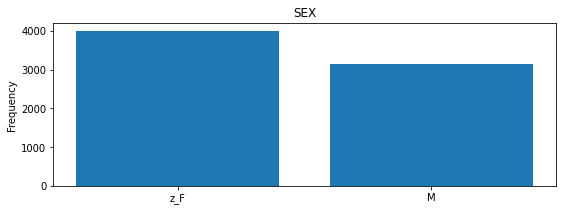

SEX: 
 z_F    4010
M      3153
Name: SEX, dtype: int64


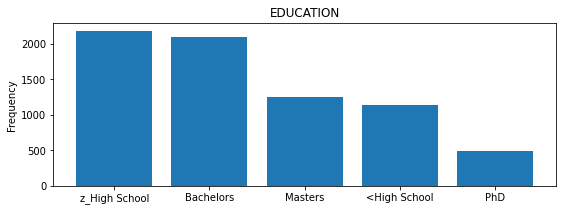

EDUCATION: 
 z_High School    2187
Bachelors        2093
Masters          1247
<High School     1144
PhD               492
Name: EDUCATION, dtype: int64


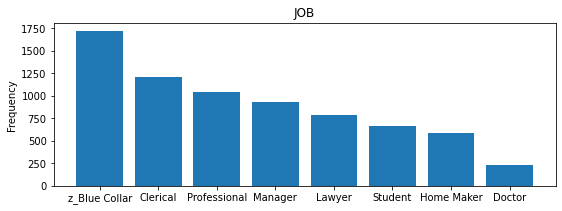

JOB: 
 z_Blue Collar    1724
Clerical         1208
Professional     1041
Manager           927
Lawyer            782
Student           664
Home Maker        586
Doctor            231
Name: JOB, dtype: int64


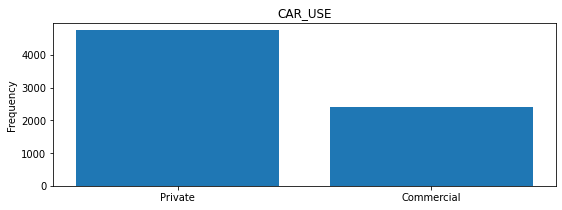

CAR_USE: 
 Private       4744
Commercial    2419
Name: CAR_USE, dtype: int64


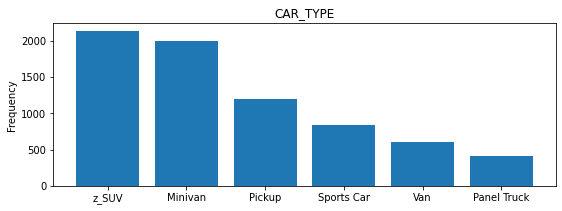

CAR_TYPE: 
 z_SUV          2138
Minivan        1990
Pickup         1190
Sports Car      841
Van             599
Panel Truck     405
Name: CAR_TYPE, dtype: int64


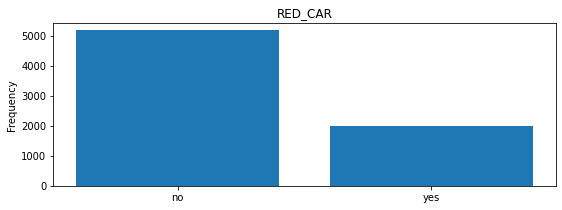

RED_CAR: 
 no     5168
yes    1995
Name: RED_CAR, dtype: int64


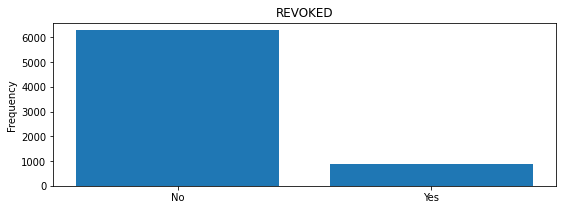

REVOKED: 
 No     6283
Yes     880
Name: REVOKED, dtype: int64


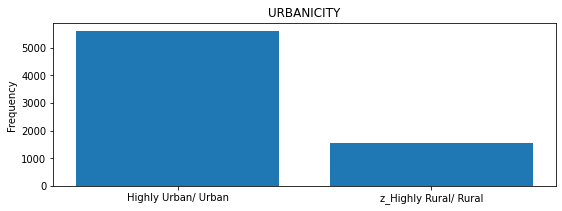

URBANICITY: 
 Highly Urban/ Urban      5614
z_Highly Rural/ Rural    1549
Name: URBANICITY, dtype: int64


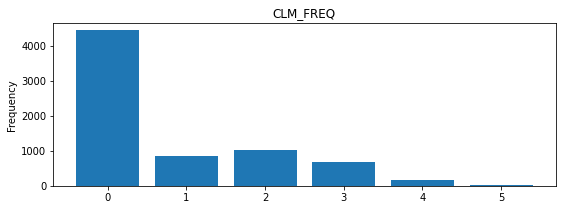

CLM_FREQ: 
 0    4434
2    1020
1     864
3     669
4     162
5      14
Name: CLM_FREQ, dtype: int64


In [19]:
for c in var_category:
    bar_plot(c)

In [20]:
# create dummy variables for categorical 
# Variables that need dummy variables ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']

for col in ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']:
    train[col] = train[col].astype("category")
    train = pd.get_dummies(train, columns = [col])

In [21]:
train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE,PARENT1_No,PARENT1_Yes,MSTATUS_Yes,MSTATUS_z_No,SEX_M,SEX_z_F,EDUCATION_<High School,EDUCATION_Bachelors,EDUCATION_Masters,EDUCATION_PhD,EDUCATION_z_High School,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Lawyer,JOB_Manager,JOB_Professional,JOB_Student,JOB_z_Blue Collar,CAR_USE_Commercial,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_Sports Car,CAR_TYPE_Van,CAR_TYPE_z_SUV,RED_CAR_no,RED_CAR_yes,REVOKED_No,REVOKED_Yes,URBANICITY_Highly Urban/ Urban,URBANICITY_z_Highly Rural/ Rural
0,1,0,0.0,0,60.0,0,11.000000,67349.000000,0.0,14,14230.0,11,4461,2,3,18.0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0
1,2,0,0.0,0,43.0,0,11.000000,91449.000000,257252.0,22,14940.0,1,0,0,0,1.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0
2,4,0,0.0,0,35.0,1,10.000000,16039.000000,124191.0,5,4010.0,4,38690,2,3,10.0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0
3,5,0,0.0,0,51.0,0,14.000000,93324.335769,306251.0,32,15440.0,7,0,0,0,6.0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0
4,6,0,0.0,0,50.0,0,11.959096,114986.000000,243925.0,36,18000.0,1,19217,2,3,17.0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0


#### Splitting train data for training and testing

In [22]:
# import library
from sklearn.model_selection import train_test_split

In [23]:
# random state for reproductivity
random_state = 123

In [24]:
# create dataset for training and testing
X = train.drop(labels = ["TARGET_FLAG", "INDEX", "TARGET_AMT"], axis = 1)
y = train["TARGET_FLAG"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)

### Models

In [25]:
# import packages for model training
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score

#### Logistic regression

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train) * 100, 2)
acc_log_test = round(logreg.score(X_test, y_test) * 100, 2)
print("Training Accuracy :% {}".format(acc_log_train))

Training Accuracy :% 73.87


#### Decision Tree

In [27]:
tree_model = DecisionTreeClassifier(random_state = random_state)
# parameters choice
tree_param_grid = {"min_samples_split" : range(10,500,20), "max_depth": range(1,20,2)}
# initialise grid search
tree_grid = GridSearchCV(tree_model, param_grid=tree_param_grid, cv = StratifiedKFold(n_splits = 10), 
                         scoring = "f1", n_jobs = -1,verbose = 1)
# fit the model to the grid search
tree_grid.fit(X_train,y_train)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1402 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  1.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=123,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
       

In [28]:
tree_grid.best_score_

0.4740869313087107

#### Random Forest

In [29]:
rf_model = RandomForestClassifier(random_state = random_state)

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "n_estimators":[100,300],
                "criterion":["gini"]}

rf_grid = GridSearchCV(rf_model, param_grid=rf_param_grid, cv = StratifiedKFold(n_splits = 10), 
                         scoring = "f1", n_jobs = -1,verbose = 1)

rf_grid.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  7.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                        

In [30]:
rf_grid.best_score_

0.5019876501826072

#### Evaluation

The models are compared using accuracy and f1 score. In the grid search above, we look for the models with best f1 score because we consider that the false positives and false negatives are equally important.

In [31]:
# test score

models = ["Logistic regression", "Decision Tree", "Random Forest"]

# accuracy 
acc = []
acc.append(round(logreg.score(X_test, y_test) * 100, 2))
acc.append(round(accuracy_score(tree_grid.best_estimator_.predict(X_test), y_test)*100, 2))
acc.append(round(accuracy_score(rf_grid.best_estimator_.predict(X_test), y_test)*100,2))

# f1 score
f1 = []
f1.append(round(f1_score(logreg.predict(X_test), y_test) * 100, 2))
f1.append(round(f1_score(tree_grid.best_estimator_.predict(X_test), y_test)*100, 2))
f1.append(round(f1_score(rf_grid.best_estimator_.predict(X_test), y_test)*100,2))

results = pd.DataFrame({"Accuracy":acc, "f1 score":f1, "Models": models})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


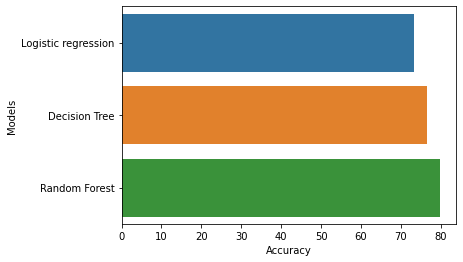

In [33]:
sns.barplot("Accuracy", "Models", data = results)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


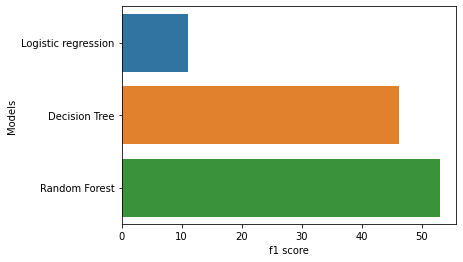

In [34]:
sns.barplot("f1 score", "Models", data = results)

In [35]:
# best estimator
best_estimator = rf_grid.best_estimator_

#### Possible improvements


The model could be improved using more knowledge on the data. For example, the consideration of ordinal encoding for categorical variables. If we know which item in the category is important, we can encorde it in proper order. Better understanding of the data could also lead to better choice of predictor variables.

### Prediction

The best estimator is applied on the test dataset.

In [36]:
# prepare the test data: create dummy variables and remove $ and , signs

# encoding categorical variables
for col in ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']:
    test[col] = test[col].astype("category")
    test = pd.get_dummies(test, columns = [col])

# convert ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM'] to integers
for i in ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']:
    test[i] = convert_to_int(i,test)

# get X for prediction
X = test.drop(labels = ["TARGET_FLAG", "TARGET_AMT"], axis = 1)
X = X.dropna()

# index 
index = X['INDEX']
X = X.drop(labels = ["INDEX"], axis = 1)

# make prediction using the best method
prediction =  pd.Series(best_estimator.predict(X), name = "Target_flag").astype(int)

# csv of prediction
result = pd.concat([index, prediction], axis = 1)
# result.to_csv("test_result.csv")